In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,f1_score,recall_score


In [2]:
df=pd.read_csv(r"C:\Users\adorn\OneDrive\Pictures\Documents\fake_job\fake_job_postings.csv")


In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [17]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


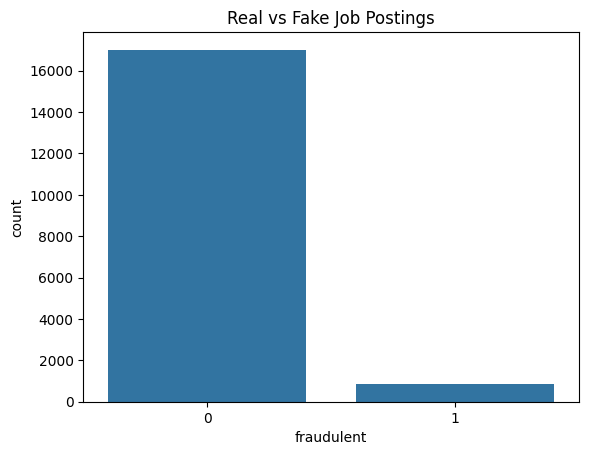

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='fraudulent', data=df)
plt.title("Real vs Fake Job Postings")
plt.show()

#class distribution


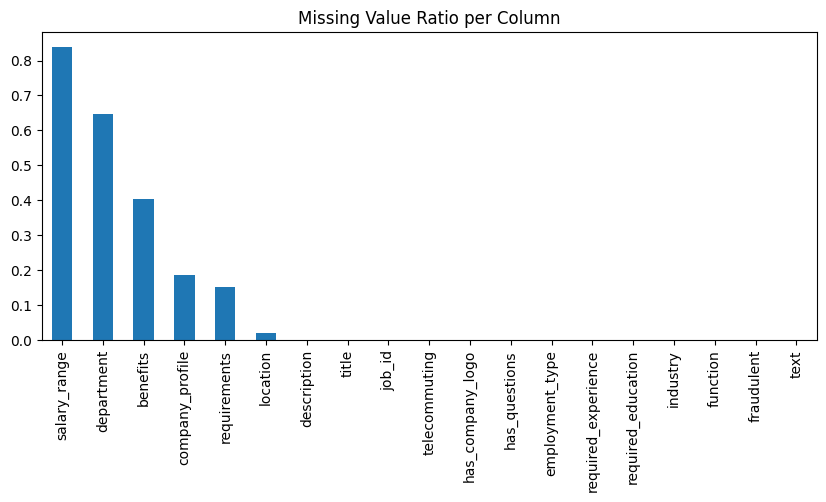

In [21]:
# # Missing values
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,4), title="Missing Value Ratio per Column")
plt.show()



Feature Engineering

In [4]:
df['text'] = (df["title"].astype(str)+ " " +  df["description"].astype(str)+ " " + df["requirements"].astype(str))


In [5]:

cat_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
bin_cols = ['telecommuting', 'has_company_logo', 'has_questions']



In [ ]:
# Combine important text columns
df['text'] = (df["title"].astype(str)+ " " +  df["description"].astype(str)+ " " +
               df["requirements"].astype(str))

onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
res = onehot.fit_transform(df[cat_cols])
X_structured = pd.concat([df[bin_cols].reset_index(drop=True),
pd.DataFrame(res, columns=onehot.get_feature_names_out(cat_cols))], axis=1)

tfidf=TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), min_df=2)
X_text =tfidf.fit_transform(df["text"])

X_final = hstack([X_structured.to_numpy(), X_text])
y=df["fraudulent"]

smote =SMOTE(random_state=42)
X_over_s, y_over_s =smote.fit_resample(X_final, y)


In [6]:
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [7]:
onehot=OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
res=onehot.fit_transform(df[cat_cols])  

# Convert to DataFrame with column names
res = pd.DataFrame(res,columns=onehot.get_feature_names_out(cat_cols),index=df.index)
#  binary and encoded categorical features
X_structured = pd.concat([df[bin_cols].reset_index(drop=True),
                          res.reset_index(drop=True)], axis=1)

In [8]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), min_df=2)
X_text = tfidf.fit_transform(df['text'])

In [9]:
from scipy.sparse import hstack
# X_final = hstack([X_structured.values, X_text])
X_final = hstack([X_structured.to_numpy(), X_text])

y = df['fraudulent']

#Final feature matrix


In [10]:
# Structured feature names (binary + one-hot)
structured_feature_names = list(X_structured.columns)
structured_feature_names



['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_Unknown',
 'required_experience_Director',
 'required_experience_Entry level',
 'required_experience_Executive',
 'required_experience_Internship',
 'required_experience_Mid-Senior level',
 'required_experience_Not Applicable',
 'required_experience_Unknown',
 "required_education_Bachelor's Degree",
 'required_education_Certification',
 'required_education_Doctorate',
 'required_education_High School or equivalent',
 "required_education_Master's Degree",
 'required_education_Professional',
 'required_education_Some College Coursework Completed',
 'required_education_Some High School Coursework',
 'required_education_Unknown',
 'required_education_Unspecified',
 'required_education_Vocational',
 'required_education_Vocational - Degree',
 'required_education_Vocational - HS Diploma',
 'industry_Airli

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_s, y_s = smote.fit_resample(X_final, y)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s,test_size=0.2, random_state=42)


MODELING

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


0.9975022039377021
0.9988238753307851
0.9961876832844575
0.9975040375862575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3410

    accuracy                           1.00      6806
   macro avg       1.00      1.00      1.00      6806
weighted avg       1.00      1.00      1.00      6806



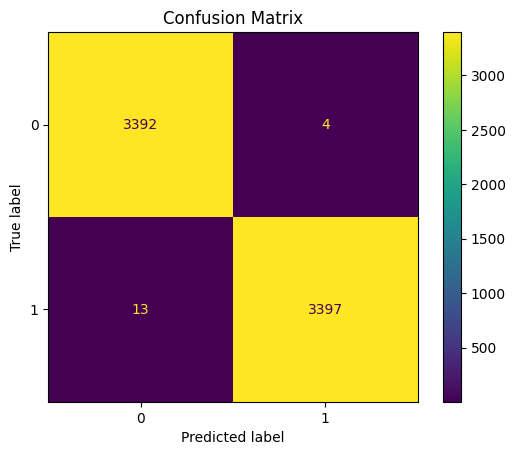

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


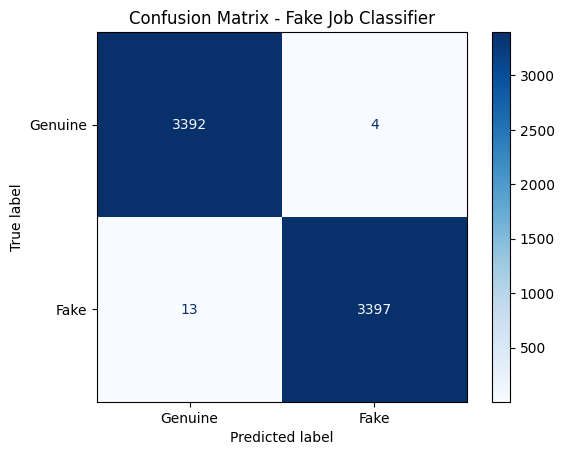

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Genuine", "Fake"], cmap="Blues")
plt.title("Confusion Matrix - Fake Job Classifier")
plt.savefig("confusion_matrix.png")
plt.show()


In [15]:
import pickle

# Save model
with open('fraud_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(onehot,f)

# Save TF-IDF
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])